## Problem Statement

> #### Price Analysis of TV's

+ In an increasingly competitive market for consumer electronics, understanding the dynamics of pricing for televisions with diverse features is critical for both manufacturers and consumers.
+ This aims to conduct a comprehensive analysis of television prices with a focus on various key factors such as brand, screen size, pixel resolution, customer rating, discount offers, operating system, and warranty.
+ The primary objective of this analysis is to uncover the factors that influence the pricing of televisions

## importing all the libraries

In [1]:
import pandas  as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
import re
from bs4 import BeautifulSoup

#### webscraping from flipkart website

In [2]:
brand=[]
screen_size=[]
rating=[]
price=[]
N_Reviews=[]
os = []
pixels = []
warranty=[]
discount=[]
for i in range(1,51):
    url=f"https://www.flipkart.com/search?q=tv&otracker=AS_Query_HistoryAutoSuggest_2_0&otracker1=AS_Query_HistoryAutoSuggest_2_0&marketplace=FLIPKART&as-show=on&as=off&as-pos=2&as-type=HISTORY&p%5B%5D=facets.price_range.from%3D15000&p%5B%5D=facets.price_range.to%3DMax&sort=relevance&page={i}"
    page=requests.get(url)
    soup=BeautifulSoup(page.text)  
    
    #brand
    for i in soup.find_all("div",class_="_4rR01T"):
        text=i.text
        regex=re.findall("^[A-Za-z]+",text)
        if regex:
            brand.append(regex[0])
        else:
            brand.append(np.nan)

    #screen_size
    for i in soup.find_all("div",class_="_4rR01T"):
        text=i.text
        regex=re.findall("(\d+)\sinch",text)
        if regex:
            screen_size.append(regex[0])
        else:
            screen_size.append(np.nan)

    #rating        
    for i in soup.find_all('div',class_='_2kHMtA'):
        b=i.find("div",class_="_3LWZlK")
        if b:      
            rating.append(b.text)
        else:
            rating.append(np.nan)

    #price
    for i in soup.find_all('div',class_='_2kHMtA'):
        b=i.find("div",class_="_30jeq3 _1_WHN1")
        if b:      
            price.append(b.text)
        else:
            price.append(np.nan)

            
    #N_Reviews
    for i in soup.find_all("div",class_="_2kHMtA"):
        a=i.find("span",class_="_2_R_DZ")       
        if a:
            regex=re.findall("&\s(\d.+)Reviews",a.text)
            N_Reviews.append(regex[0])
        else:
            N_Reviews.append(np.nan)

    #Os
    for i in soup.find_all('div',class_='_2kHMtA'):
        a = i.find('li',class_='rgWa7D') 
        regex = re.findall(':\s(\w+)',a.text)
        if regex:           
            os.append(regex[0])
        else:
            os.append(np.nan)

    #pixels
    for i in soup.find_all('div',class_='_2kHMtA'):
        text=i.text
        regex = re.findall('(\d+\sx\s\d+)\sPixels',text)
        if regex:
            pixels.append(regex[0])
        else:
            pixels.append(np.nan)
            
    #warranty
    for i in soup.find_all("div",class_="_2kHMtA"):
        text=i.text
        regex=re.findall("Pixels(\d)",text)
        if regex:
            warranty.append(regex[0])
        else:
            warranty.append(np.nan)
            
    #discount
    for i in soup.find_all("div",class_="_2kHMtA"):
        a=i.find("div",class_="_3Ay6Sb")      
        if a:
            regex = re.findall('^\d+',a.text)
            discount.append(regex[0])
        else:
            discount.append(np.nan)


In [3]:
dic={"Brand":brand,"Rating":rating,"N_Reviews":N_Reviews,"Price":price,"Screen_size":screen_size,"warranty":warranty,"pixels":pixels,"os":os,"discount":discount}

In [4]:
df=pd.DataFrame(dic)

In [5]:
df

,Brand,Rating,N_Reviews,Price,Screen_size,warranty,pixels,os,discount
0,Mi,4.4,"45,921","₹22,999",40,1,1920 x 1080,Google,23
1,Mi,4.4,"45,921","₹24,999",43,1,1920 x 1080,Google,30
2,OnePlus,4.3,"7,196","₹24,999",43,1,1920 x 1080,Android,21
3,iFFALCON,4.2,"2,206","₹19,999",43,1,3840 x 2160,Google,59
4,OnePlus,4.3,"7,196","₹15,999",32,1,1366 x 768,Android,27
...,...,...,...,...,...,...,...,...,...
979,SONY,4.5,12,"₹65,499",43,1,3840 x 2160,NaN,10
980,Cellecor,NaN,NaN,"₹21,499",43,2,1920 x 1080,Android,40
981,Cellecor,NaN,NaN,"₹16,999",40,2,1920 x 1080,Android,34
982,MOTOROLA,4.3,777,"₹20,999",40,1,1920 x 1080,Android,30


In [6]:
df.to_csv("tv.csv",index=None)

In [4]:
df=pd.read_csv("tv.csv")
df

,Brand,Rating,N_Reviews,Price,Screen_size,warranty,pixels,os,discount
0,Mi,4.4,"45,921","₹22,999",40.0,1.0,1920 x 1080,Google,23.0
1,Mi,4.4,"45,921","₹24,999",43.0,1.0,1920 x 1080,Google,30.0
2,OnePlus,4.3,"7,196","₹24,999",43.0,1.0,1920 x 1080,Android,21.0
3,iFFALCON,4.2,"2,206","₹19,999",43.0,1.0,3840 x 2160,Google,59.0
4,OnePlus,4.3,"7,196","₹15,999",32.0,1.0,1366 x 768,Android,27.0
...,...,...,...,...,...,...,...,...,...
979,SONY,4.5,12,"₹65,499",43.0,1.0,3840 x 2160,NaN,10.0
980,Cellecor,NaN,NaN,"₹21,499",43.0,2.0,1920 x 1080,Android,40.0
981,Cellecor,NaN,NaN,"₹16,999",40.0,2.0,1920 x 1080,Android,34.0
982,MOTOROLA,4.3,777,"₹20,999",40.0,1.0,1920 x 1080,Android,30.0


## Data Cleaning

In [6]:
#removing Special Characters like(',','₹')
df["Price"]=df['Price'].replace("[^\d]","",regex=True)
df["N_Reviews"]=df['N_Reviews'].replace("[^\d]","",regex=True)

In [7]:
#removing Nan values
df=df.dropna(how='any',subset=['Screen_size','warranty'])
df=df.dropna(how='any',subset=['discount','N_Reviews'])

In [8]:
df.dtypes

Brand           object
Rating         float64
N_Reviews       object
Price           object
Screen_size    float64
warranty       float64
pixels          object
os              object
discount       float64
dtype: object

In [9]:
# Changing data types
df["Price"]=df['Price'].astype('int')
df["Screen_size"]=df['Screen_size'].astype('int')
df["warranty"]=df['warranty'].astype('int')
df["N_Reviews"]=df['N_Reviews'].astype('int')
df["discount"]=df["discount"].astype("int")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 695 entries, 0 to 983
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        695 non-null    object 
 1   Rating       695 non-null    float64
 2   N_Reviews    695 non-null    int32  
 3   Price        695 non-null    int32  
 4   Screen_size  695 non-null    int32  
 5   warranty     695 non-null    int32  
 6   pixels       691 non-null    object 
 7   os           669 non-null    object 
 8   discount     695 non-null    int32  
dtypes: float64(1), int32(5), object(3)
memory usage: 40.7+ KB


In [11]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
976     True
977     True
979    False
982    False
983    False
Length: 695, dtype: bool

In [12]:
df

,Brand,Rating,N_Reviews,Price,Screen_size,warranty,pixels,os,discount
0,Mi,4.4,45921,22999,40,1,1920 x 1080,Google,23
1,Mi,4.4,45921,24999,43,1,1920 x 1080,Google,30
2,OnePlus,4.3,7196,24999,43,1,1920 x 1080,Android,21
3,iFFALCON,4.2,2206,19999,43,1,3840 x 2160,Google,59
4,OnePlus,4.3,7196,15999,32,1,1366 x 768,Android,27
...,...,...,...,...,...,...,...,...,...
976,Dyanora,4.1,517,19999,43,1,3840 x 2160,WebOS,47
977,Cellecor,2.9,2,16199,40,2,1366 x 768,Android,37
979,SONY,4.5,12,65499,43,1,3840 x 2160,NaN,10
982,MOTOROLA,4.3,777,20999,40,1,1920 x 1080,Android,30


In [13]:
# droping duplicate values in dataframe
df = df.drop_duplicates(keep = "first")


In [14]:
df[df.duplicated()]

,Brand,Rating,N_Reviews,Price,Screen_size,warranty,pixels,os,discount


#### Outliers detection

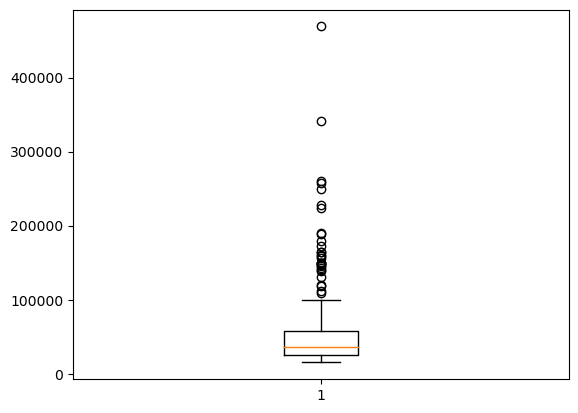

In [15]:
plt.boxplot(df["Price"])
plt.show()

In [16]:
q1=df["Price"].quantile(0.25)
q3=df["Price"].quantile(0.75)
iqr=q3-q1
lower=q1-(1.5*iqr)
upper=q3+(1.5*iqr)

In [17]:
df["Price"]=df["Price"].map(lambda x:lower if x<lower else upper if x>upper else x)

C:\Users\eternal\AppData\Local\Temp\ipykernel_7280\713571385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Price"]=df["Price"].map(lambda x:lower if x<lower else upper if x>upper else x)


In [18]:
df['Price']

0      22999.0
1      24999.0
2      24999.0
3      19999.0
4      15999.0
        ...   
974    20302.0
975    74990.0
979    65499.0
982    20999.0
983    28999.0
Name: Price, Length: 344, dtype: float64

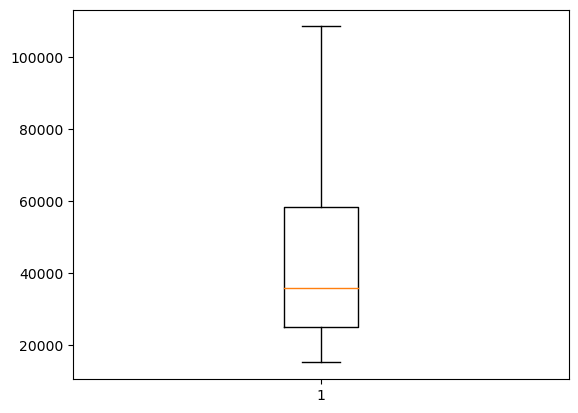

In [19]:
plt.boxplot(df["Price"])
plt.show()

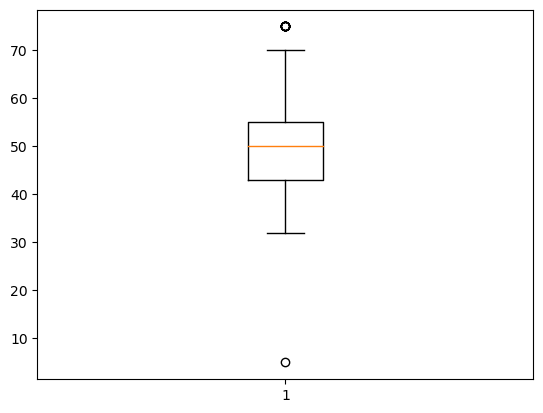

In [20]:
plt.boxplot(df["Screen_size"])
plt.show()

In [21]:
q1=df["Screen_size"].quantile(0.25)
q3=df["Screen_size"].quantile(0.75)
iqr=q3-q1
lower=q1-(1.5*iqr)
upper=q3+(1.5*iqr)

In [22]:
df["Screen_size"]=df["Screen_size"].map(lambda x:lower if x<lower else upper if x>upper else x)

C:\Users\eternal\AppData\Local\Temp\ipykernel_7280\3385830176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Screen_size"]=df["Screen_size"].map(lambda x:lower if x<lower else upper if x>upper else x)


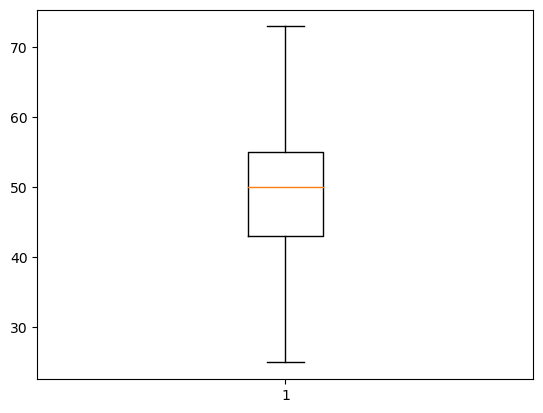

In [23]:
plt.boxplot(df["Screen_size"])
plt.show()

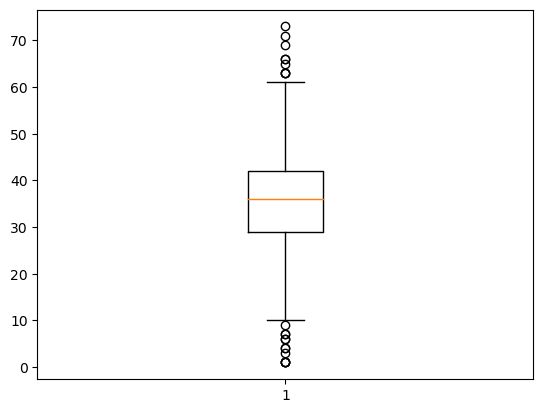

In [24]:
plt.boxplot(df["discount"])
plt.show()

In [25]:
q1=df["discount"].quantile(0.25)
q3=df["discount"].quantile(0.75)
iqr=q3-q1
lower=q1-(1.5*iqr)
upper=q3+(1.5*iqr)

In [26]:
df["discount"]=df["discount"].map(lambda x:lower if x<lower else upper if x>upper else x)

C:\Users\eternal\AppData\Local\Temp\ipykernel_7280\704164712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["discount"]=df["discount"].map(lambda x:lower if x<lower else upper if x>upper else x)


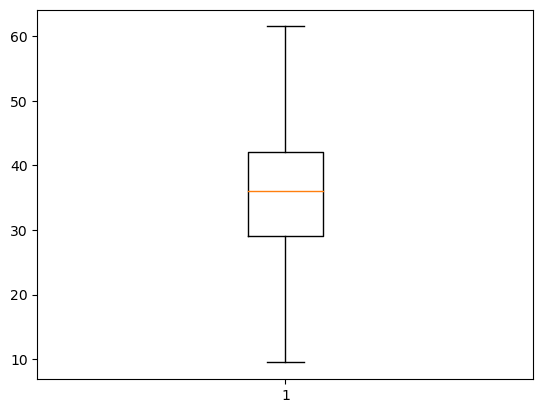

In [27]:
plt.boxplot(df["discount"])
plt.show()

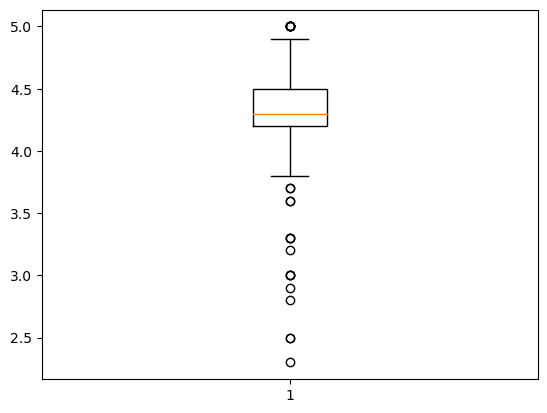

In [28]:
plt.boxplot(df["Rating"])
plt.show()

In [29]:
m=df["Rating"].mean()
s=df["Rating"].std()
lower=m-(3*s)
upper=m+(3*s)

In [30]:
print(lower)
print(upper)
print(m)
print(s)

3.2217474593667
5.373601377842602
4.297674418604651
0.35864231974598365


In [31]:
df["Rating"]=df["Rating"].map(lambda x:lower if x<lower else upper if x>upper else x)

C:\Users\eternal\AppData\Local\Temp\ipykernel_7280\2037769880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Rating"]=df["Rating"].map(lambda x:lower if x<lower else upper if x>upper else x)


In [32]:
df['Rating']=df['Rating'].round(1)

C:\Users\eternal\AppData\Local\Temp\ipykernel_7280\2685956991.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rating']=df['Rating'].round(1)


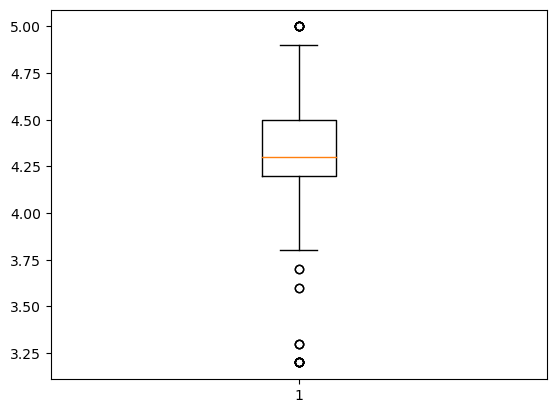

In [33]:
plt.boxplot(df["Rating"])
plt.show()

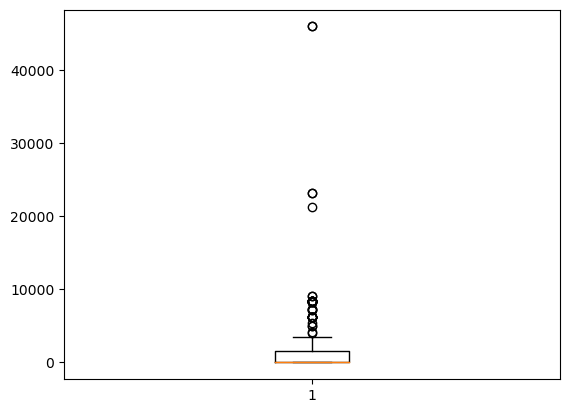

In [34]:
plt.boxplot(df["N_Reviews"])
plt.show()

In [35]:
m=df["N_Reviews"].mean()
s=df["N_Reviews"].std()
lower=m-(3*s)
upper=m+(3*s)

In [36]:
df["N_Reviews"]=df["N_Reviews"].map(lambda x:lower if x<lower else upper if x>upper else x)

C:\Users\eternal\AppData\Local\Temp\ipykernel_7280\1563385972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["N_Reviews"]=df["N_Reviews"].map(lambda x:lower if x<lower else upper if x>upper else x)


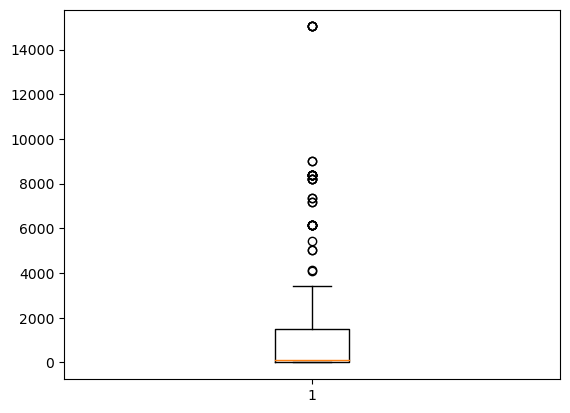

In [37]:
plt.boxplot(df["N_Reviews"])
plt.show()

In [38]:
#replacing pixels into 3 types 4k,1080p,720p
df['pixels']=df['pixels'].replace("3840 x 2160","4k")
df['pixels']=df['pixels'].replace("1920 x 1080","1080p")
df['pixels']=df['pixels'].replace("1366 x 768","720p")
df['pixels']=df['pixels'].replace("1280 x 720","720p")
df['pixels']=df['pixels'].replace("1080 x 1920","1080p")

C:\Users\eternal\AppData\Local\Temp\ipykernel_7280\3678446188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pixels']=df['pixels'].replace("3840 x 2160","4k")
C:\Users\eternal\AppData\Local\Temp\ipykernel_7280\3678446188.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pixels']=df['pixels'].replace("1920 x 1080","1080p")
C:\Users\eternal\AppData\Local\Temp\ipykernel_7280\3678446188.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [39]:
df['pixels'].value_counts()

4k       264
1080p     42
720p      35
Name: pixels, dtype: int64

In [40]:
# adding column with Tv quality
df["Tvquality"]="Excellent"
df.loc[df['Rating']<4.0,'Tvquality']='Good'
df.loc[df['Rating']<3.5,'Tvquality']='Average'
df.loc[df['Rating']==3.0,'Tvquality']='fair'
df.loc[df['Rating']<2.5,'Tvquality']='poor'

C:\Users\eternal\AppData\Local\Temp\ipykernel_7280\2922502717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Tvquality"]="Excellent"


## Data visualization

### Univariate

Question: What is the distribution of product ratings?

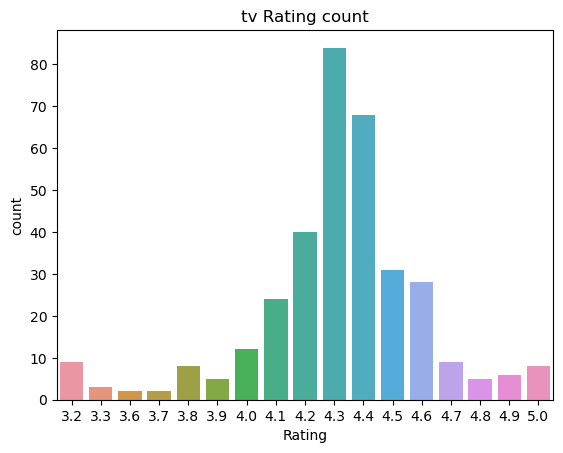

In [41]:
plt.title('tv Rating count')
sns.countplot(data=df, x=df['Rating'])
plt.show()

By observing the above data we can say that maximum tv's are having 4.3 ratings
And the least ratings are 3.3,3.6 and 3.7

Question 2: What can we infer from the distribution of Categorical features such as Brand, os, and pixels,Tvquality in the Tv dataset?

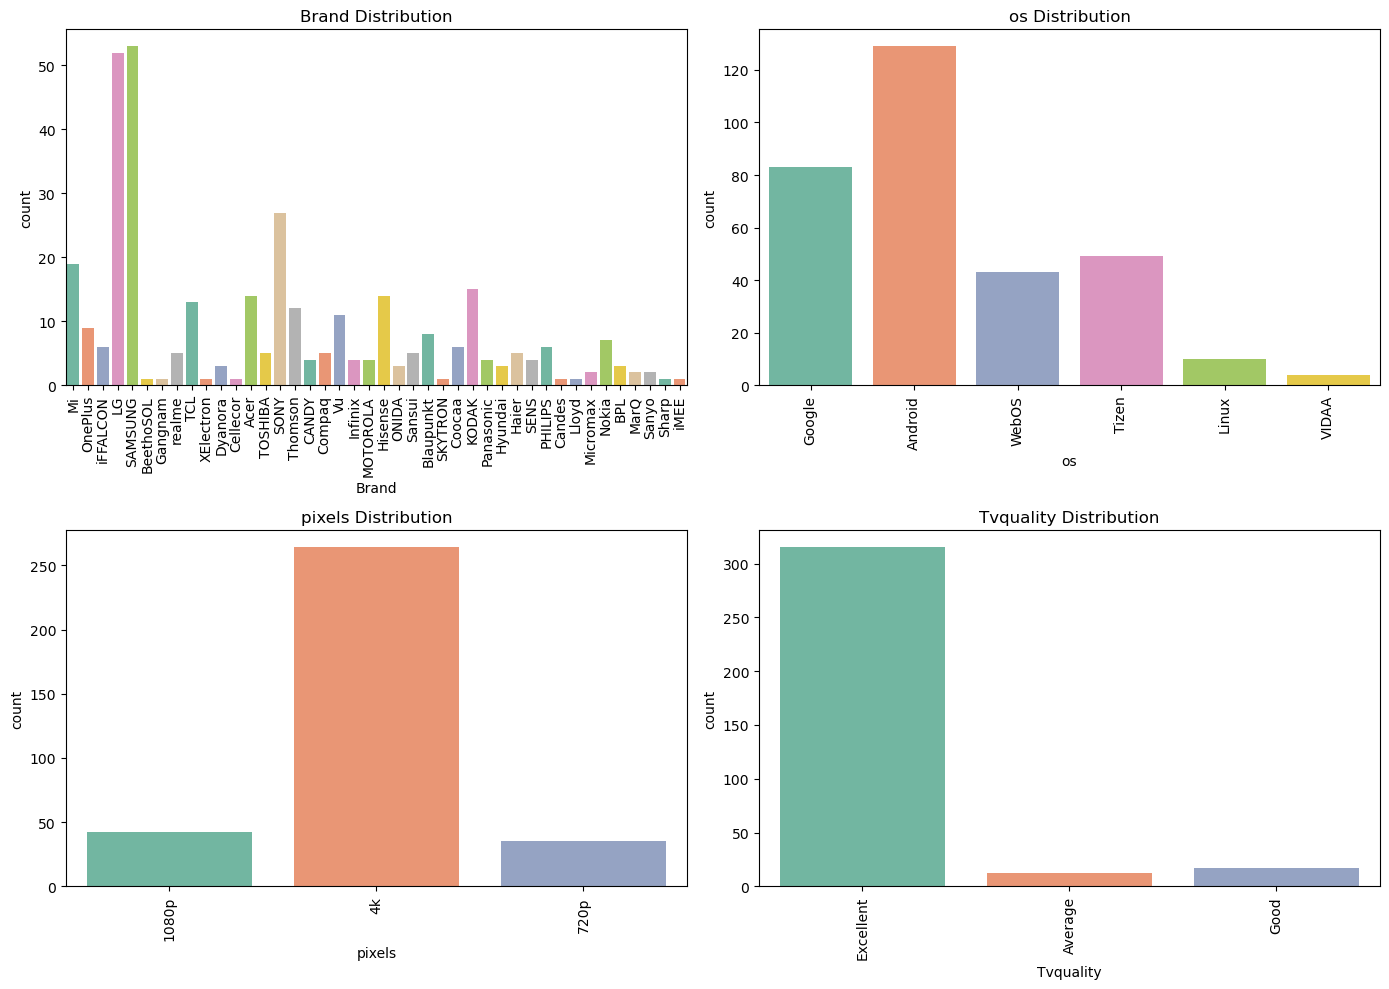

In [42]:
# Categorical Variables
categorical_vars = ["Brand", "os", "pixels", "Tvquality"]
plt.figure(figsize=(14, 10))
for var in categorical_vars:
    plt.subplot(2, 2, categorical_vars.index(var) + 1)
    sns.countplot(data=df, x=var, palette="Set2")
    plt.title(f"{var} Distribution")
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**os distribution**
The most preferred ostype is Android because they may be more luxurous
The least preferred are LINUX, and VIDAA

**brand distribution**
The most preferred brand is SAMSUNG and LG because they may be more luxurous
The least preferred are sharp,skytron,XElectron,Llyod.

**pixel distribution**
The most preferred pixel type is 4k resolution because they may be more luxurous
The least preferred are 720 pixels

**tvquality distribution**
The most preferred tvquality type is Excellent because they may be more luxurous
The least preferred  are average

Question: What can we infer from the distribution of numerical features such as Screen_size, warranty, and price, discount in the TV dataset?

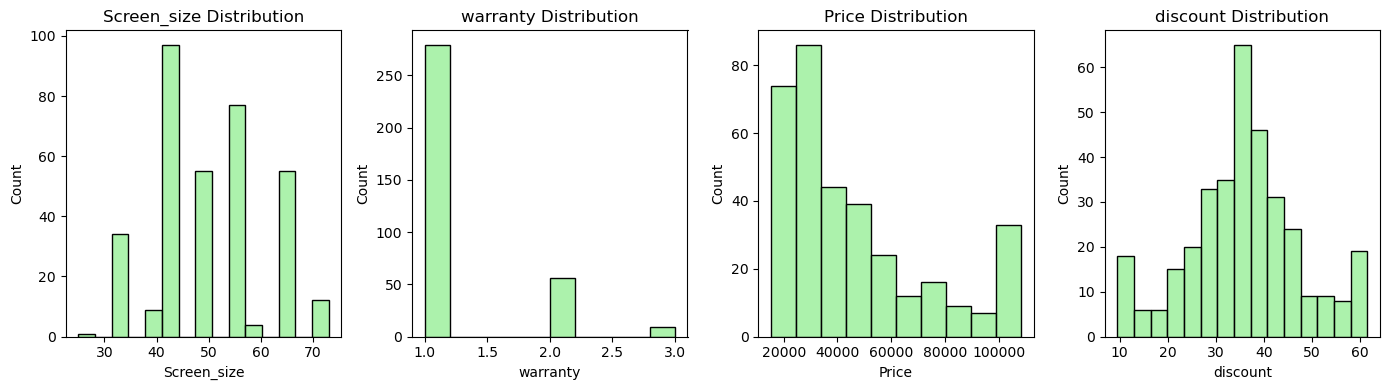

In [43]:
# Numerical Variables
numerical_vars = ["Screen_size", "warranty", "Price","discount"]
plt.figure(figsize=(14, 4))
for var in numerical_vars:
    plt.subplot(1, 4, numerical_vars.index(var) + 1) 
    sns.histplot(data=df, x=var, color="lightgreen")
    plt.title(f"{var} Distribution")
plt.tight_layout()
plt.show()
#numerical_vars.index(var) + 1 part is used to ensure that each subplot gets the correct index, 
#corresponding to the order of the numerical variables in the list.

**Discount distribution** 
By observing the above data we can say that there are maximum tv's providing 35% discount

**Screen_size distribution**
The most preferred Screen_size type is between 44 to 41 because they may be more luxurous The least preferred Screen_size is less than 30

**Warranty Distribution** 
The most preferred Warranty is 1 year because they may be more luxurous The least preferred are 3 year

**price Distribution** 
The most preferred price is 30,000 because they may be more affordable The least preferred are 90,000

# Bivariate

#### os vs Price
Question: How do prices vary across different os?

Text(0.5, 1.0, 'os v/s Price')

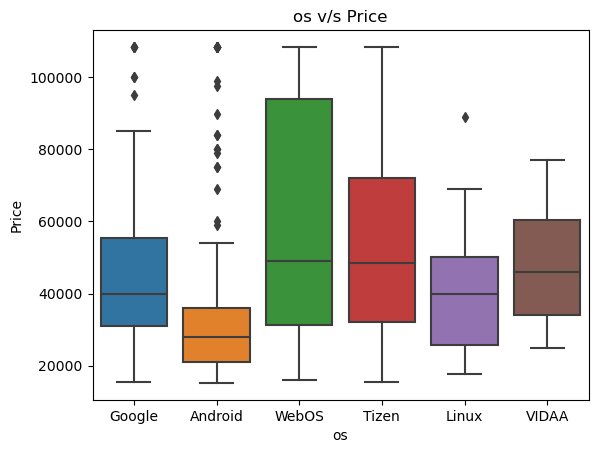

In [44]:
sns.boxplot(data=df,x=df["os"],y=df["Price"])
plt.title('os v/s Price')

WEBOS and Tizen os have high price

#### Price vs. Brand:
Question: How do prices vary across different brands? Are some brands generally more expensive than others?

Text(0.5, 1.0, 'Price v/s Brand')

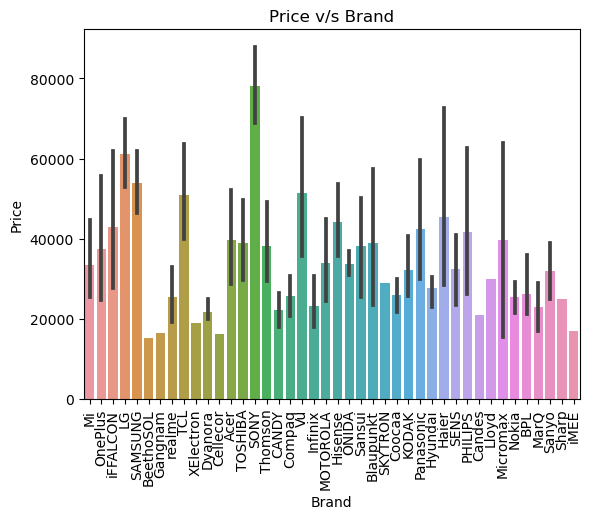

In [45]:
sns.barplot(data=df,x=df["Brand"],y=df["Price"])
plt.xticks(rotation=90)
plt.title('Price v/s Brand')

Brand sony has high price and imee ,cellecor has least price

#### Price vs. Pixels:
Question: Is there a relationship between the pixel count of a product and its price? Do products with higher pixel counts tend to be more expensive?

Text(0.5, 1.0, 'Pixels v/s Price')

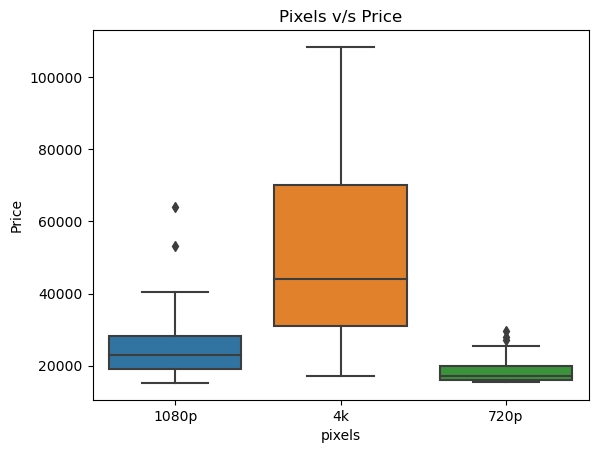

In [46]:
sns.boxplot(data=df,x=df["pixels"],y=df["Price"])
plt.title('Pixels v/s Price')

4k resolution has highest price and 720 pixels has lowest price

higher the pixel will be higher the price

#### Price vs. Warranty:
Question: Do products with longer warranty durations have higher prices? How does warranty length affect pricing?

Text(0.5, 1.0, 'Price v/s Warranty')

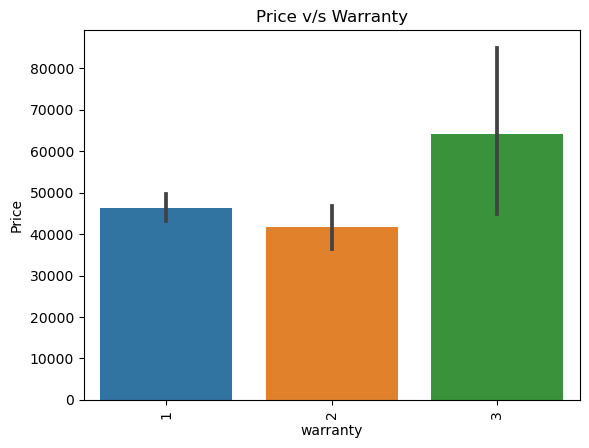

In [47]:
sns.barplot(data=df,x=df["warranty"],y=df["Price"])
plt.xticks(rotation=90)
plt.title('Price v/s Warranty')

by observation it shows higher warranty has higher price

question :
How does the tv's Rating, Screen_size, and discount relate to their Price?


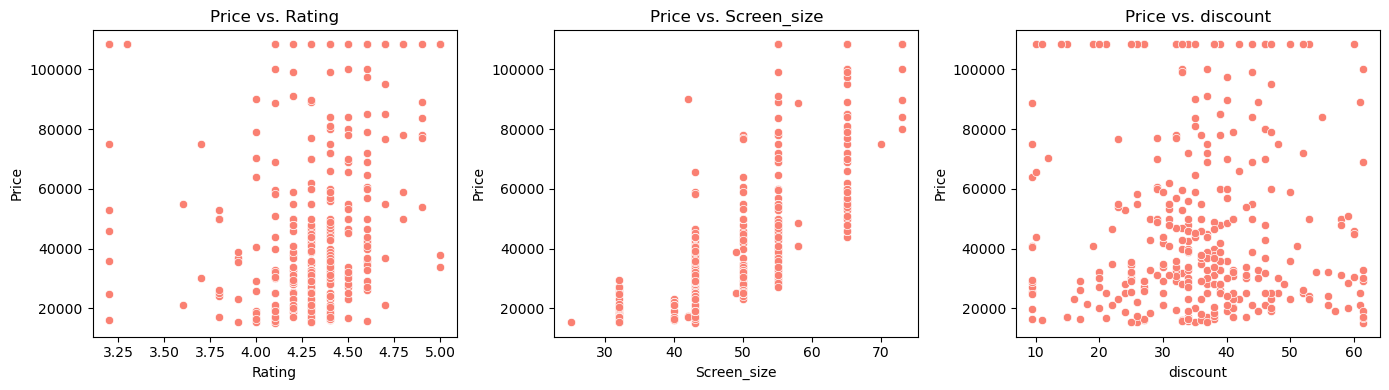

In [48]:
numerical_vars = ["Rating", "Screen_size", "discount"]
plt.figure(figsize=(14, 4))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(data=df, x=var, y="Price", color="salmon")
    plt.title(f"Price vs. {var}")
plt.tight_layout()
plt.show()

**Price vs. Rating:** 
This doesn't seem to be a strong linear relationship between tv Price and ratings.it indicating that ratings alone might not heavily influence user satisfaction.


**price vs. Screen_size:**
The scatterplot indicates that tv with higher screen_size periods tend to have higher price. This suggests that users might feel more satisfied with tv that come with longer screen_size.


**price vs. Discount:** 
The scatterplot shows a mixed pattern – while there isn't a clear linear relationship between price and discount.so, discount and price doesnot have effect on each other

## Multivariate

Question: Does Tvquality impact product prices, and how does this relationship differ for various os?

<Axes: xlabel='Tvquality', ylabel='Price'>

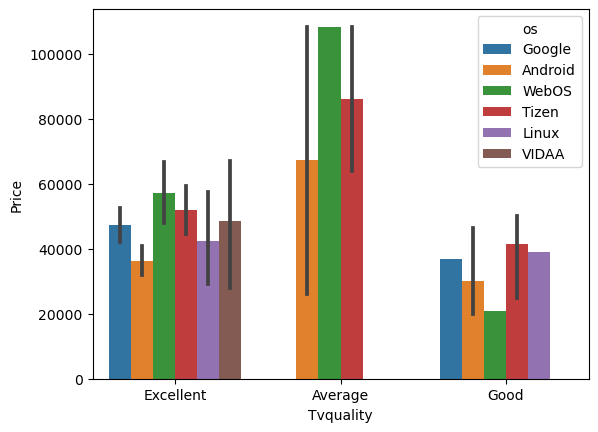

In [49]:
sns.barplot(x = df["Tvquality"], y = df["Price"], hue = df["os"],data=df)

There is almost all os types of tv are having excellent tvquality and with prices between 40,000 to 60,000

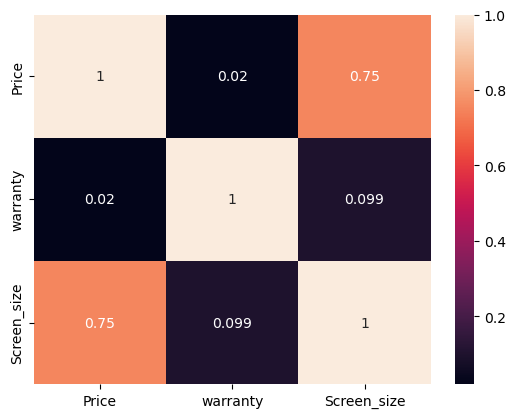

In [50]:
sns.heatmap(df[['Price','warranty','Screen_size']].corr(), annot=True)
plt.show()

#### pairplot
To plot multiple pairwise bivariate distributions in a dataset,we use the .pairplot() function. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. That creates plots as shown below.

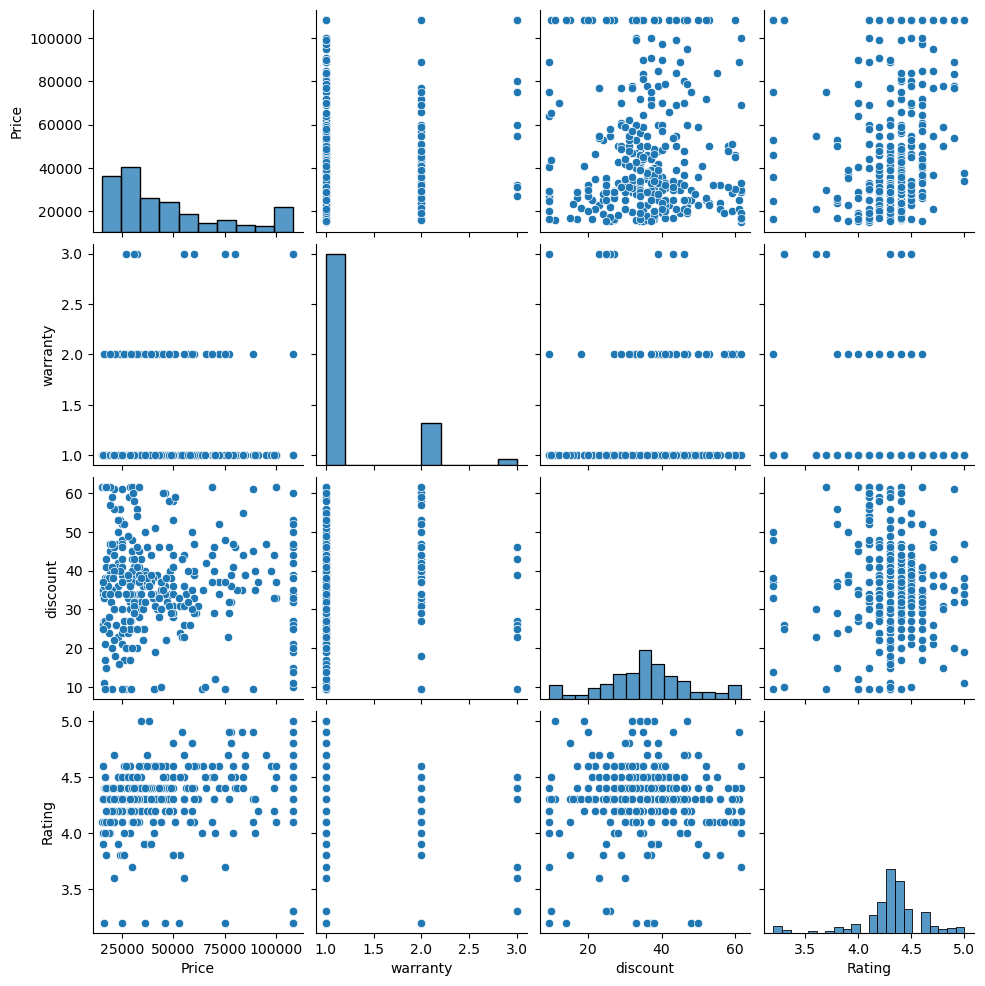

In [51]:
sns.pairplot(data=df,vars=['Price','warranty','discount','Rating'])

#### Scenario

In [52]:
#To find the hotels with highest discount.
df.nlargest(5,'discount')

,Brand,Rating,N_Reviews,Price,Screen_size,warranty,pixels,os,discount,Tvquality
10,BeethoSOL,4.1,180.0,15199.0,43.0,1,1080p,Android,61.5,Excellent
11,Gangnam,4.0,22.0,16599.0,43.0,1,1080p,Android,61.5,Excellent
93,SKYTRON,4.0,37.0,28999.0,55.0,1,4k,WebOS,61.5,Excellent
312,Coocaa,4.2,96.0,18999.0,43.0,1,1080p,Google,61.5,Excellent
352,Lloyd,3.7,1.0,29999.0,55.0,1,4k,Android,61.5,Good


In [53]:
#when we wanted to find tv with with excellent quality under 40000
df[(df["Price"]<40000)&(df["Tvquality"]=='Excellent')].head(5)

,Brand,Rating,N_Reviews,Price,Screen_size,warranty,pixels,os,discount,Tvquality
0,Mi,4.4,15030.201246,22999.0,40.0,1,1080p,Google,23.0,Excellent
1,Mi,4.4,15030.201246,24999.0,43.0,1,1080p,Google,30.0,Excellent
2,OnePlus,4.3,7196.000000,24999.0,43.0,1,1080p,Android,21.0,Excellent
3,iFFALCON,4.2,2206.000000,19999.0,43.0,1,4k,Google,59.0,Excellent
4,OnePlus,4.3,7196.000000,15999.0,32.0,1,720p,Android,27.0,Excellent


In [54]:
#find tv with 5.0 rating
df[(df["Rating"]==5.0)]

,Brand,Rating,N_Reviews,Price,Screen_size,warranty,pixels,os,discount,Tvquality
303,SONY,5.0,1.0,108440.875,65.0,1,4k,Google,32.0,Excellent
363,SONY,5.0,1.0,108440.875,65.0,1,4k,Google,34.0,Excellent
429,SAMSUNG,5.0,0.0,33990.000,43.0,1,1080p,Tizen,34.0,Excellent
464,SONY,5.0,1.0,108440.875,65.0,1,4k,Android,11.0,Excellent
513,SONY,5.0,2.0,108440.875,73.0,1,4k,Android,38.0,Excellent
519,LG,5.0,1.0,108440.875,65.0,1,4k,NaN,47.0,Excellent
548,LG,5.0,0.0,37890.000,43.0,1,4k,NaN,36.0,Excellent
878,SAMSUNG,5.0,1.0,108440.875,65.0,1,4k,Tizen,19.0,Excellent


## Conclusion

- most prefered brands are Samsung,Lg
- most prefered os type android
- most prefered pixels are 4k resolution
- most prefered rating 4.3
- higher the screen size has higher the prices
- higher the warranty has higher the prices
- higher the pixels have higher the prices
- screen size , pixels, warranty are the factors mostly influencing the prices of tv's
- consumers are mostly prefered to buy TV around screensize from 44 to 41 and price around 30000 rupees and  1 year warranty